# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [2]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                        'address_raw',
                                                        'lat',
                                                        'lon',
                                                        'bfs_number',
                                                        'bfs_name',
                                                        'rooms', 
                                                        'area', 
                                                        'luxurious', 
                                                        'price', 
                                                        'price_per_m2',
                                                        'pop',
                                                        'pop_dens',
                                                        'emp',
                                                        'frg_pct',
                                                        'mean_taxable_income']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)



,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Quantiles original values

In [3]:
df_orig[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1337.00,1.00,26.00,17.90,336.03
0.10,1492.50,1.50,41.50,20.02,525.66
0.25,1842.25,2.50,63.00,23.30,1044.63
0.50,2391.00,3.50,86.00,27.95,1662.60
0.75,3056.75,4.50,108.75,38.12,4778.99
0.90,3960.00,4.75,140.50,52.78,4778.99
0.95,4957.50,5.50,163.75,67.33,4778.99


### Filter apartments

In [4]:
# Filter apartments (replace '<= 5000' by the respective operator and quantile)
df = df_orig.loc[df_orig['pop_dens'] >= 525.66]

### Shape (number of rows and colums)

In [5]:
# Number of rows and columns
print(df.shape)

(708, 16)


### Data types

In [6]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables

In [7]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000
mean,47.400627,8.594750,193.779661,3.322034,89.024011,0.014124,2664.511299,34.570819,178474.192090,2743.664122,196723.347458,29.061191,80799.443875
std,0.078267,0.109910,77.872685,1.289757,75.957542,0.118087,1340.896540,17.548976,188793.058872,1676.656562,227572.421712,6.625123,14794.502793
min,47.195290,8.387365,2.000000,1.000000,8.000000,0.000000,10.000000,0.040000,952.000000,525.662252,129.000000,9.056485,64322.797996
25%,47.360285,8.519975,136.000000,2.500000,60.000000,0.000000,1818.000000,23.967500,13067.000000,1268.125855,5906.250000,24.535004,70964.087938
50%,47.392986,8.559372,230.000000,3.500000,82.000000,0.000000,2380.000000,28.700000,113173.000000,1810.358566,73339.000000,31.847134,82932.737704
75%,47.446150,8.703384,261.000000,4.500000,104.250000,0.000000,3100.000000,39.235000,420217.000000,4778.994655,491193.000000,32.458468,82932.737704
max,47.693893,8.866929,261.000000,8.500000,1633.000000,1.000000,9950.000000,149.900000,420217.000000,4778.994655,491193.000000,46.226483,174434.537050


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [8]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 708 Min: 10.0 Max: 9950.0 Mean: 2664.5 Median: 2380.0 Std: 1340.9
Area: Count: 708 Min: 8.0 Max: 1633.0 Mean: 89.0 Median: 82.0 Std: 76.0


### Skewness

In [9]:
df[['price','rooms', 'area']].skew()

price     2.032744
rooms     0.282398
area     13.510591
dtype: float64

### Kurtosis

In [10]:
df[['price','rooms', 'area']].kurtosis()

price      6.064953
rooms      0.257726
area     256.265062
dtype: float64

### Extreme values

In [11]:
# Low costs apartments
df[df['price_per_m2'] <= 10]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
183,1693998317-653,"8001 Zürich, ZH",47.374966,8.543989,261,Zürich,4.5,137.0,0,16.0,0.12,420217,4778.994655,491193.0,32.458468,82932.737704
198,1693998326-702,"Hohenbühlstrasse 7, 8032 Zürich, ZH",47.366306,8.551867,261,Zürich,5.5,183.0,0,10.0,0.05,420217,4778.994655,491193.0,32.458468,82932.737704
404,1693998205-39,"Binzigerstrasse 52, 8707 Uetikon am See, ZH",47.267185,8.689932,159,Uetikon am See,6.5,300.0,1,11.0,0.04,6201,1792.196532,1480.0,21.270763,118977.376698
511,1693998369-926,"Dorfstrasse 2, 8309 Nürensdorf, ZH",47.458389,8.638629,64,Nürensdorf,6.5,863.0,0,4500.0,5.21,5602,557.968127,1031.0,16.815423,99039.717665
584,1693998289-482,"Lärchenstrasse 6, 8442 Hettlingen, ZH",47.547836,8.717198,221,Hettlingen,6.0,1633.0,0,3900.0,2.39,3169,537.118644,702.0,9.056485,101569.727626


In [12]:
# Very expansive apartments
df[df['price_per_m2'] >= 100]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
11,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",47.362282,8.522193,261,Zürich,2.0,32.0,0,3515.0,109.84,420217,4778.994655,491193.0,32.458468,82932.737704
20,1693998214-82,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,30.0,0,3790.0,126.33,420217,4778.994655,491193.0,32.458468,82932.737704
21,1693998214-83,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,25.0,0,3490.0,139.60,420217,4778.994655,491193.0,32.458468,82932.737704
107,1693998280-434,"Neugasse 40, 8005 Zürich, ZH",47.382469,8.530180,261,Zürich,1.0,11.0,0,1120.0,101.82,420217,4778.994655,491193.0,32.458468,82932.737704
154,1693998305-585,"Steinstrasse 35, 8003 Zürich, ZH",47.366997,8.520324,261,Zürich,1.0,15.0,0,1500.0,100.00,420217,4778.994655,491193.0,32.458468,82932.737704
171,1693998309-621,"Baurstrasse 29, 8008 Zürich, ZH",47.355923,8.554498,261,Zürich,1.5,30.0,0,3890.0,129.67,420217,4778.994655,491193.0,32.458468,82932.737704
185,1693998317-658,"8004 Zürich, ZH",47.380417,8.525352,261,Zürich,1.0,10.0,0,1499.0,149.90,420217,4778.994655,491193.0,32.458468,82932.737704


### Get a list of categories of categorical variable

In [13]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Adliswil', 'Affoltern am Albis', 'Bachenbülach', 'Bassersdorf',
       'Bonstetten', 'Bülach', 'Dielsdorf', 'Dietikon', 'Dietlikon',
       'Dübendorf', 'Dürnten', 'Egg', 'Eglisau', 'Embrach', 'Fehraltorf',
       'Feuerthalen', 'Fällanden', 'Gossau (ZH)', 'Greifensee',
       'Hedingen', 'Herrliberg', 'Hettlingen', 'Hombrechtikon', 'Höri',
       'Hüttikon', 'Kloten', 'Küsnacht (ZH)', 'Langnau am Albis', 'Maur',
       'Meilen', 'Männedorf', 'Neerach', 'Niederglatt', 'Niederhasli',
       'Nürensdorf', 'Oberengstringen', 'Oberglatt', 'Obfelden',
       'Oetwil am See', 'Oetwil an der Limmat', 'Opfikon', 'Pfungen',
       'Pfäffikon', 'Regensdorf', 'Richterswil', 'Rorbas', 'Rümlang',
       'Rüschlikon', 'Rüti (ZH)', 'Schlieren', 'Schwerzenbach', 'Seuzach',
       'Stäfa', 'Thalwil', 'Uetikon am See', 'Uitikon', 'Urdorf', 'Uster',
       'Volketswil', 'Wallisellen', 'Wangen-Brüttisellen',
       'Weiningen (ZH)', 'Wettswil am Albis', 'Wetzikon (ZH)', 'Winkel',
       'Winterthu

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [14]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0,6.5,7.0,7.5,8.5
luxurious,,,,,,,,,,,,,,,
0,52,35,38,130,43,180,26,136,3,38,2,9,2,3,1
1,0,0,0,6,0,3,0,0,0,0,0,1,0,0,0


### Pivot tables

In [15]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.0   0            52   32.057692    52  1306.346154           52  50.168077
1.5   0            35   35.028571    35  2129.885714           35  66.443143
2.0   0            38   54.131579    38  2163.894737           38  42.971579
2.5   0           130   66.776923   130  2406.015385          130  37.397077
      1             6   72.166667     6  3339.500000            6  45.978333
3.0   0            43   68.116279    43  1952.720930           43  28.530930
3.5   0           180   89.244444   180  2703.116667          180  30.213389
      1             3  101.666667     3  6036.666667            3  59.826667
4.0   0            26   93.346154    26  2880.230769           26  30.733846
4.5   0           136  114.808824   136  3173.279412          136  27.153603
5.0   0             3  108.000000     3  2881.666667            3  26.376667
5.5   0            38  154.394737    38  3686.657895           38  24.009474
6.0   0             2  891.500000     2  4350.000000            2  17.195000
6.5   0             9  241.888889     9  4546.333333            9  25.102222
      1             1  300.000000     1    11.000000            1   0.040000
7.0   0             2  175.000000     2  6350.000000            2  36.325000
7.5   0             3  205.000000     3  4765.000000            3  23.273333
8.5   0             1  210.000000     1  8500.000000            1  40.480000

### Correlation matrix

In [16]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.995098,0.602200,-0.375190,-0.509481,-0.598999
area,0.995098,1.000000,0.646701,-0.318156,-0.453694,-0.546725
price,0.602200,0.646701,1.000000,0.514078,0.379765,0.278235
price_per_m2,-0.375190,-0.318156,0.514078,1.000000,0.988321,0.966596
pop_dens,-0.509481,-0.453694,0.379765,0.988321,1.000000,0.994191
frg_pct,-0.598999,-0.546725,0.278235,0.966596,0.994191,1.000000


### Covariance matrix

In [17]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.663474,51.774435,8.055070e+02,-10.582145,-5.812189e+02,-1.643966
area,51.774435,5769.548220,3.562140e+04,-413.702184,-2.044031e+04,-98.432613
price,805.506964,35621.395061,1.798004e+06,6232.618025,6.469710e+05,809.839720
price_per_m2,-10.582145,-413.702184,6.232618e+03,307.966556,1.643210e+04,32.401525
pop_dens,-581.218909,-20440.306304,6.469710e+05,16432.098014,2.811177e+06,6541.093444
frg_pct,-1.643966,-98.432613,8.098397e+02,32.401525,6.541093e+03,43.892250


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

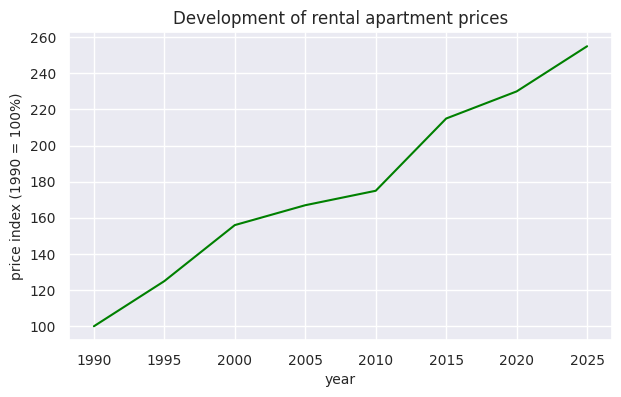

In [18]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

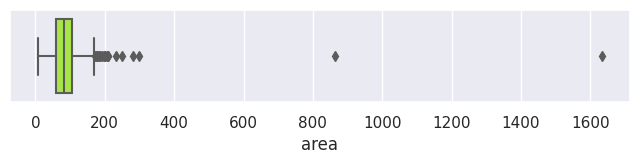

In [19]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

### Histogram  (matplotlib)

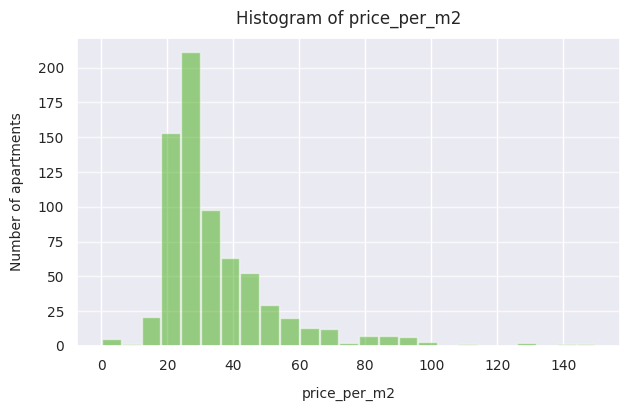

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

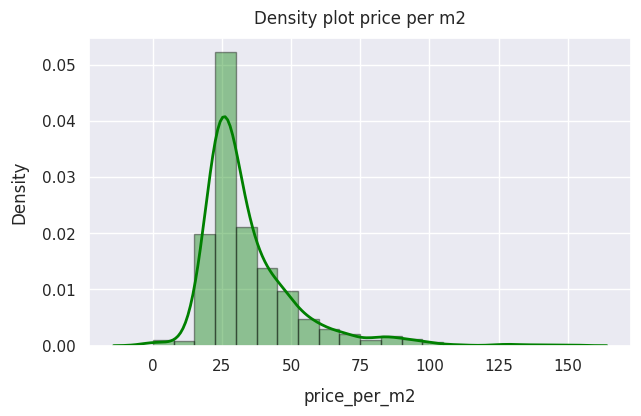

In [21]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

       area        var
682     8.0  -1.066701
185    10.0  -1.040371
107    11.0  -1.027206
190    14.0  -0.987710
431    15.0  -0.974545
..      ...        ...
205   250.0   2.119289
445   282.0   2.540577
404   300.0   2.777552
511   863.0  10.189587
584  1633.0  20.326829

[708 rows x 2 columns]


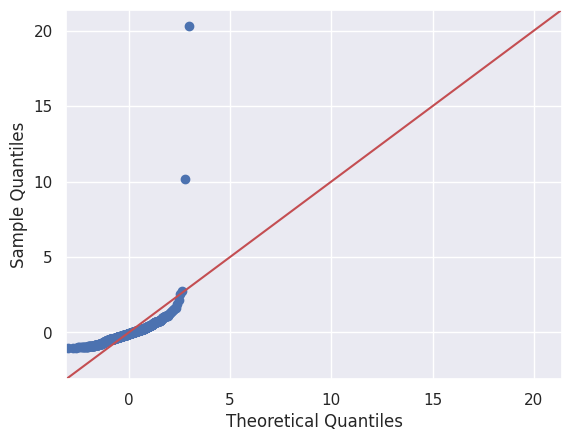

In [22]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [23]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[8.5, 7.0, 6.0, 7.5, 5.0, 6.5, 4.0, 1.5, 5.5, 2.0, 3.0, 1.0, 2.5, 4.5, 3.5]

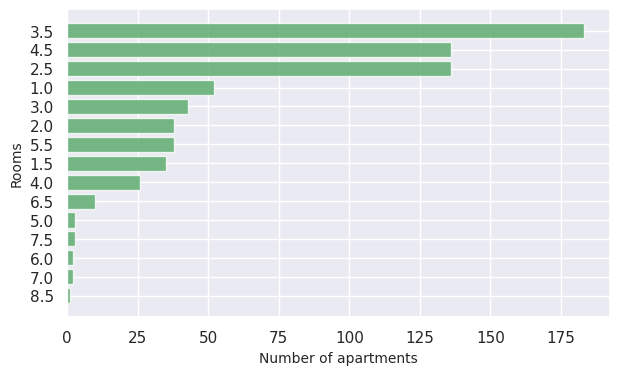

In [24]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

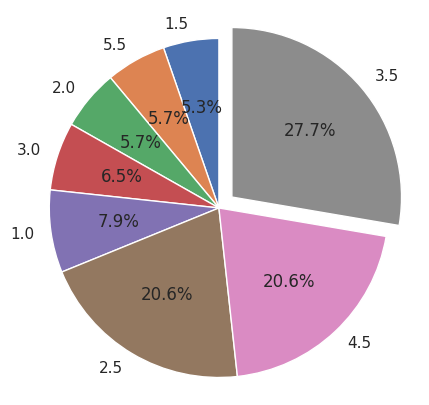

In [25]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

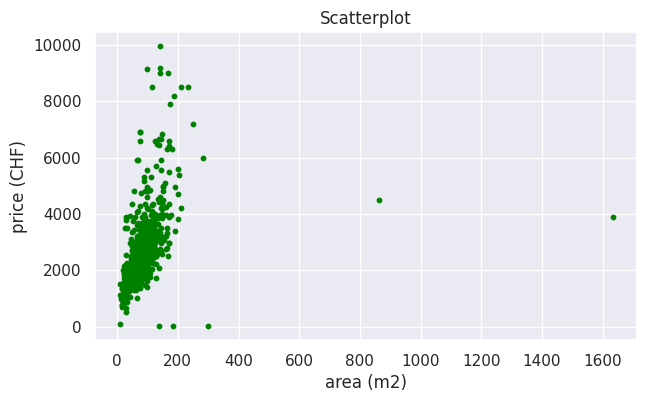

In [26]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(691, 17)
6.1253908040271
2164.0245554017083


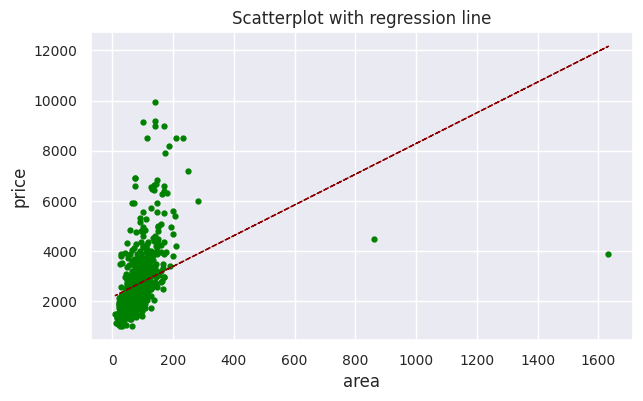

In [27]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

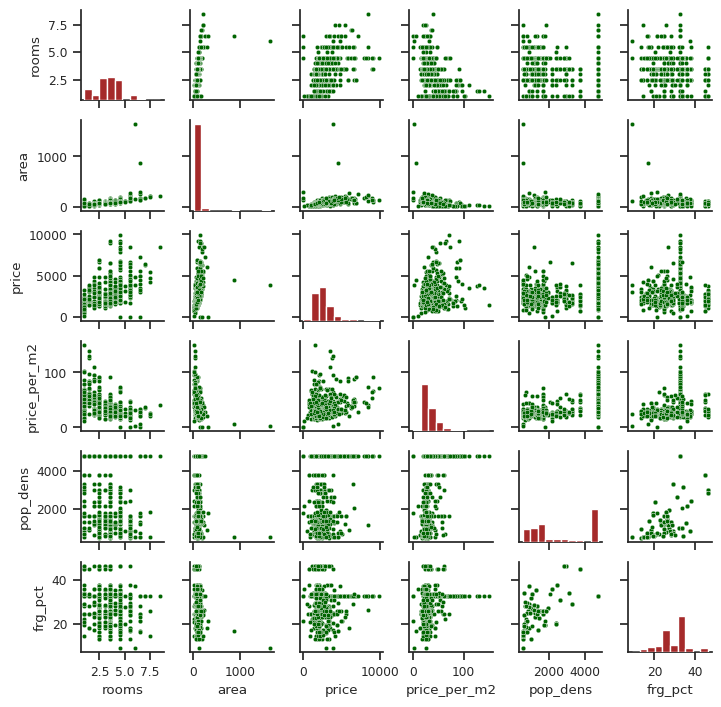

In [28]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(678, 17)


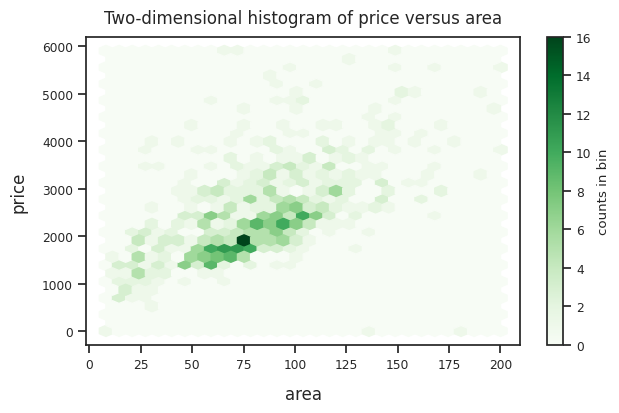

In [29]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

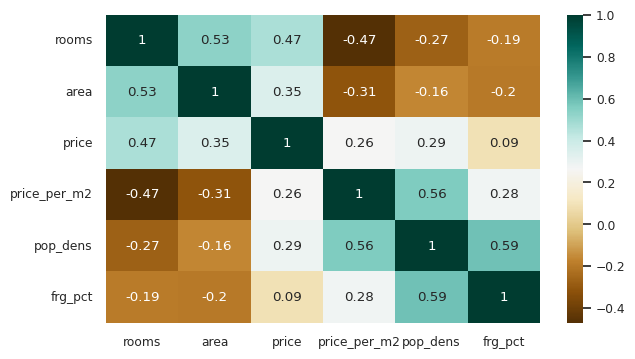

In [30]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

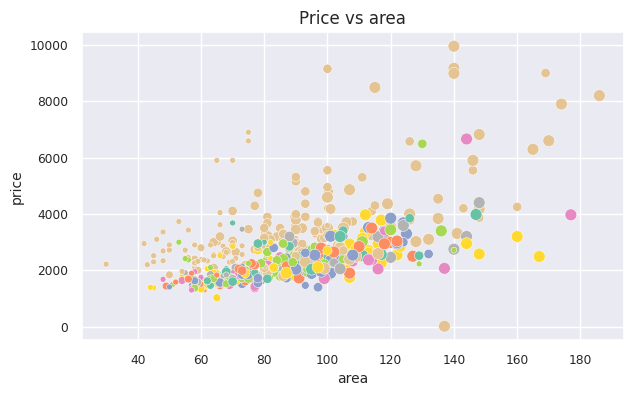

In [31]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [32]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1014-azure
Datetime: 2023-10-13 18:00:38
Python Version: 3.10.13
-----------------------------------
